In [1]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 15.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# A guide througth Natural Language Processing

## Spacy

It is a library for perform NLP analysis in industrial environments. It contains a huge set of pre-trained models to perform common analytical tasks in several languagues. Let's go througth a tipical NLP pipeline

In [1]:
# from https://www.bolsamania.com/noticias/resultados-anuncios/adobe-desploma-10-tras-incumplir-pronosticos-previsiones--16440704.html
text = """Adobe Systems se ha desplomado un 13,67% en Wall Street después de presentar anoche sus resultados trimestrales, que se han situado por encima de lo previsto. Sin embargo, la compañía tecnológica, especializada en software para diseño y edición de vídeo, no ha convencido con sus perspectivas para el próximo trimestre.
Adobe ha presentado un beneficio por acción (BPA) de 4,48 dólares, cifra que ha superado los 4,38 dólares anticipados por el consenso. Sus ingresos de 5.180 millones de dólares han superado ligeramente los 5.150 millones estimados.
La compañía creadora del célebre programa informático Photoshop ha aumentado un 11% sus ingresos de la división 'Creative', hasta 3.070 millones, y ha impulsado un 18% sus ventas de 'Document Cloud', hasta 750 millones. Los ingresos del negocio 'Digital Experience' aumentaron un 10%, hasta 1.290 millones."""

In [2]:
import spacy
from IPython.display import YouTubeVideo

nlp = spacy.load("es_core_news_sm")

In [3]:
doc = nlp(text)

The first step is to split the text into senteces and tokens

In [4]:
# Get the sentences in the text
for i,sent in enumerate(doc.sents):
  print("====================================")
  print(f"Sentence {i+1}:{sent}")
  print("*Token*","*POS*", "*Lemma*")
  for token in sent:
    print(token.text, token.pos_, token.lemma_)

Sentence 1:Adobe Systems se ha desplomado un 13,67% en Wall Street después de presentar anoche sus resultados trimestrales, que se han situado por encima de lo previsto.
*Token* *POS* *Lemma*
Adobe PROPN Adobe
Systems PROPN Systems
se PRON él
ha AUX haber
desplomado VERB desplomar
un DET uno
13,67% SYM 13,67%
en ADP en
Wall PROPN Wall
Street PROPN Street
después ADV después
de ADP de
presentar VERB presentar
anoche ADV anoche
sus DET su
resultados NOUN resultado
trimestrales ADJ trimestral
, PUNCT ,
que PRON que
se PRON él
han AUX haber
situado VERB situar
por ADP por
encima ADV encima
de ADP de
lo PRON él
previsto ADJ previsto
. PUNCT .
Sentence 2:Sin embargo, la compañía tecnológica, especializada en software para diseño y edición de vídeo, no ha convencido con sus perspectivas para el próximo trimestre. 

*Token* *POS* *Lemma*
Sin ADP sin
embargo NOUN embargo
, PUNCT ,
la DET el
compañía NOUN compañía
tecnológica ADJ tecnológico
, PUNCT ,
especializada ADJ especializado
en ADP en
so

- What are POS tags (ie. PUNCT, DET, NOUN, ADP, etc) mean?
- What is lemma?

Part-of-Speech tags [more info](https://universaldependencies.org/u/pos/all.html#al-u-pos/).

## Dependencies tree and Entitiy Recognition

In [5]:
from spacy import displacy

In [6]:
displacy.serve(doc, style="dep")

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [7]:
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Word Embeddings

Machine learning algorithms requires vector to perform their tasks, so, it is necesary transform this unstructured data into numerical vectors. Spacy provides a mechanish to this purpose, using a pretrained models. Normally, these models are variation from the Word2Vec approach.

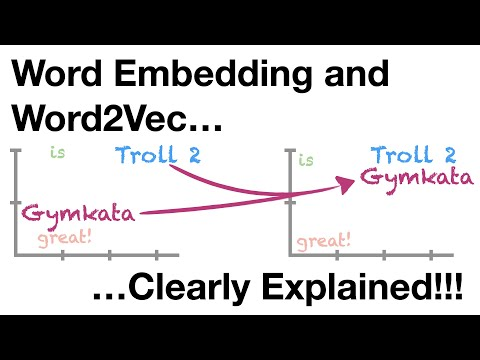

In [8]:
YouTubeVideo('viZrOnJclY0',width=640, height=480)

Let's see the vector for a token

In [9]:
doc[4]

desplomado

In [10]:
doc[4].vector

array([ 2.1513336e+00,  3.8212757e+00, -2.4727240e+00,  1.1535820e+00,
       -1.6150403e+00,  3.2224009e+00,  1.0830530e+00,  3.3249193e-01,
        2.6129563e+00,  7.9433256e-01,  1.5067264e+00, -3.0979097e+00,
       -3.6850199e-01, -1.5906949e+00, -1.6623731e+00, -2.9212887e+00,
        3.9648587e-01,  1.6895950e-01,  2.7932259e-01, -7.9823172e-01,
       -1.4931012e+00,  2.2612131e-01, -1.3243885e+00, -9.3249369e-01,
        1.7557245e-01,  1.5488263e+00,  1.0010312e+00,  2.0848341e+00,
        1.3905798e+00, -2.7728505e+00, -9.2376280e-01, -2.2447424e+00,
       -9.9501312e-01, -4.9017459e-01,  3.5734906e+00, -8.4604466e-01,
       -4.0663481e-03,  1.0492748e-01, -2.7970526e+00, -2.5576489e+00,
        6.9670539e+00, -9.4847322e-01, -2.0874374e+00,  5.1346855e+00,
       -3.7106619e+00,  5.1786482e-02,  1.6428061e+00, -7.3673487e-01,
       -7.5065154e-01, -5.8380026e-01, -3.3173227e-01, -1.7711480e+00,
       -1.6639094e+00, -1.1969854e+00,  2.7530780e+00,  2.5839889e-01,
      

Once the word are transformed into vectors, it is posible to applied numericar analysis, like distance-base similarity.

In [11]:
peace = nlp("paz")
war = nlp("guerra")
pacific = nlp("pacifico")
tranquillity = nlp("tranquilidad")

In [12]:
nlp(war).similarity(peace)

<ipython-input-12-39f12f7bbf44>:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  nlp(war).similarity(peace)


0.49525255053670625

Find the most similar word to the *peace* word.

The document vector is the average of the token's vectors included, this vector can be used to feed a ML model.

In [13]:
doc.vector

array([ 0.02945914, -0.01658466, -0.25987417,  0.0686994 ,  0.08602981,
        0.19433604,  0.47527057,  0.08227803,  0.21582228,  0.2753046 ,
        0.03639442,  0.05102094,  0.3634939 ,  0.17386642, -0.36141807,
        0.67049664,  0.0089467 ,  0.07962054, -0.08404258, -0.46741262,
        0.3782504 ,  0.35768557,  0.25306076, -0.06080115, -0.55635124,
        0.37636796,  0.6150542 , -0.40848187,  0.29183376,  0.7139664 ,
       -0.2528487 , -0.30777812, -0.36573085,  0.11481973,  0.31923288,
        0.5234942 , -0.60467166, -0.24622433,  0.5333977 , -0.304141  ,
       -0.41608104, -0.19645983,  0.00144449,  0.09961925,  0.19098052,
        0.22693522,  0.6378535 ,  0.9721539 ,  0.03160456,  0.43382084,
       -0.3019728 , -0.08690233,  0.14662476, -0.08618736, -0.12214397,
       -0.02647307, -0.09083523, -0.0143204 , -0.45369697, -0.5973885 ,
        0.08384535, -0.2703296 , -0.09891494, -0.254824  , -0.3658645 ,
        0.4094919 ,  0.48151883, -0.09833802,  0.73519015,  0.27

### Assignment

*   Count the tokens per sentence.
*   Find the sentences with the highest amount of Adjectives (ADJ).
*   Find the most similar pair of tokens in each sentece.






In [14]:
from transformers import pipeline

# Sentiment analysis using pretrained models from Hugging Face

Sentiment analysis is a common NLP task which tries to automatically detect if a phrase contains a positive or negatives speech about a topic. Let's try to perform this task using a pretrained model from Hugging Face, a Git hub portal for Machine learning models.

Let's use the [Finance Sentiment ES Model](https://huggingface.co/bardsai/finance-sentiment-es-base).

In [15]:
hg_sa_model = pipeline("sentiment-analysis", model="bardsai/finance-sentiment-es-base")
hg_sa_model("Las ventas netas aumentaron un 30%, hasta 36 millones de euros.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/928 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/730k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.9999439716339111}]

### Assignment

Use this model to estimate the sentiment of each sentences in the text.

# The Grand Finale: A simple chat-bot using Llama 2 language model

A Language model is neural network base model, it use complex architecture (Recurrent with attention mechanisms, aka. Transformers and more) to learn which are the best sequence of tokens that continues a entry sequence.



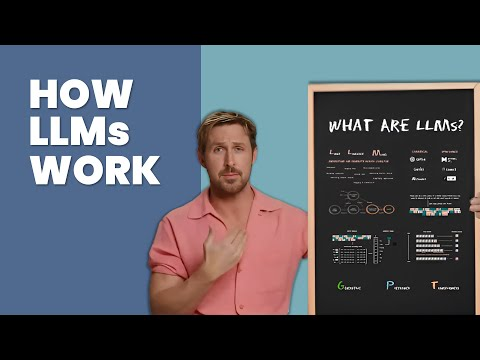

In [18]:
YouTubeVideo('xU_MFS_ACrU',width=640, height=480)

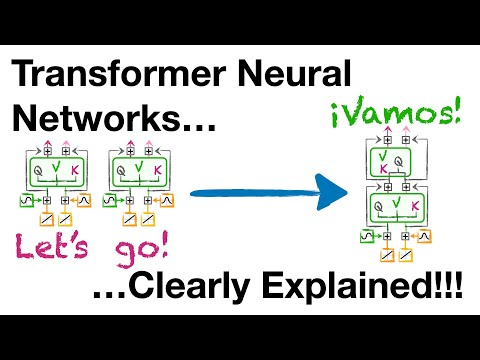

In [19]:
YouTubeVideo('zxQyTK8quyY',width=640, height=480)

## Using the Llama 2 model

Petals is a set of optimized Language models that can be used without big computational resources. The following section is based in the [Petals introductory notebook](https://colab.research.google.com/drive/1uCphNY7gfAUkdDrTx21dZZwCOUDCMPw8?usp=sharing#scrollTo=pBC52TF3LVY1).

In [1]:
%pip install git+https://github.com/bigscience-workshop/petals

  Cloning https://github.com/bigscience-workshop/petals to /tmp/pip-req-build-jfofsmfo
  Running command git clone --filter=blob:none --quiet https://github.com/bigscience-workshop/petals /tmp/pip-req-build-jfofsmfo
  Resolved https://github.com/bigscience-workshop/petals to commit d6f4f80f3f524dd7d961f409ed3d5b0c8bc957e9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 33.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from transformers import AutoTokenizer
from petals import AutoDistributedModelForCausalLM

Loading the model

In [3]:
model_name = "petals-team/StableBeluga2" # The simplified version of Llama 2 model
# You can also use any other supported model from 🤗 Model Hub

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False, add_bos_token=False)
model = AutoDistributedModelForCausalLM.from_pretrained(model_name)
model = model.cuda()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

Apr 15 13:18:30.477 [INFO] Make sure you follow the LLaMA's terms of use: https://bit.ly/llama2-license for LLaMA 2, https://bit.ly/llama-license for LLaMA 1
Apr 15 13:18:30.478 [INFO] Using DHT prefix: StableBeluga2-hf


model.safetensors.index.json:   0%|          | 0.00/62.5k [00:00<?, ?B/s]

model_00081-of-00081.safetensors:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

/usr/lib/python3.10/asyncio/subprocess.py:218: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  transport, protocol = await loop.subprocess_exec(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

Generating text from the model

In [4]:
inputs = tokenizer('A cat in French is "', return_tensors="pt")["input_ids"].cuda()
outputs = model.generate(inputs, max_new_tokens=3)
print(tokenizer.decode(outputs[0]))

Apr 15 13:24:53.448 [INFO] Route found: 0:80 via …3NNV6q


A cat in French is "un chat"


In [5]:
fake_token = tokenizer("^")["input_ids"][0]  # Workaround to make tokenizer.decode() keep leading spaces

text = "What is a good chatbot? Answer:"
prefix = tokenizer(text, return_tensors="pt")["input_ids"].cuda()

with model.inference_session(max_length=30) as sess:
    for i in range(20):
        # Prefix is passed only for the 1st token of the outputs
        inputs = prefix if i == 0 else None

        # Let's use sampling with temperature = 0.9 and top_p = 0.6 to get more diverse results
        outputs = model.generate(inputs, max_new_tokens=1, session=sess,
                                 do_sample=True, temperature=0.9, top_p=0.6)

        text += tokenizer.decode([fake_token, outputs[0, -1].item()])[1:]
        print(text)

Apr 15 13:27:34.170 [INFO] Route found: 0:80 via …3NNV6q
Apr 15 13:29:28.604 [INFO] NumExpr defaulting to 2 threads.


What is a good chatbot? Answer: A
What is a good chatbot? Answer: A good
What is a good chatbot? Answer: A good chat
What is a good chatbot? Answer: A good chatbot
What is a good chatbot? Answer: A good chatbot is
What is a good chatbot? Answer: A good chatbot is one
What is a good chatbot? Answer: A good chatbot is one that
What is a good chatbot? Answer: A good chatbot is one that can
What is a good chatbot? Answer: A good chatbot is one that can understand
What is a good chatbot? Answer: A good chatbot is one that can understand user
What is a good chatbot? Answer: A good chatbot is one that can understand user input
What is a good chatbot? Answer: A good chatbot is one that can understand user input,
What is a good chatbot? Answer: A good chatbot is one that can understand user input, provide
What is a good chatbot? Answer: A good chatbot is one that can understand user input, provide relevant
What is a good chatbot? Answer: A good chatbot is one that can understand user input, pro

And finally, the basic chat bot

In [6]:
with model.inference_session(max_length=512) as sess:
    while True:
        prompt = input('Human: ')
        if prompt == "":
            break
        prefix = f"Human: {prompt}\nFriendly AI:"
        prefix = tokenizer(prefix, return_tensors="pt")["input_ids"].cuda()
        print("Friendly AI:", end="", flush=True)

        while True:
            outputs = model.generate(prefix, max_new_tokens=1, session=sess,
                                     do_sample=True, temperature=0.9, top_p=0.6)
            outputs = tokenizer.decode([fake_token, outputs[0, -1].item()])[1:]

            # Now, let's print one new token at a time
            print(outputs, end="", flush=True)

            if "\n" in outputs or "</s>" in outputs:
                break
            prefix = None  # Prefix is passed only for the 1st token of the bot's response

Human: Hi
Friendly AI:

Apr 15 13:32:31.584 [INFO] Route found: 0:80 via …3NNV6q


 Hi there! How can I help you today?


KeyboardInterrupt: Interrupted by user

### Assignment

What means the parameters *do_sample*, *temperature*, *top_p* do?  